In [ ]:
from google.colab import files
import pandas as pd
import os

print("📁 Upload your 4 CSV files one by one:")
uploaded = files.upload()

# List the uploaded files
print("✅ Uploaded files:")
for filename in uploaded.keys():
    print(f"   - {filename}")

📁 Upload your 4 CSV files one by one:


Saving slouching.csv to slouching.csv
✅ Uploaded files:
   - slouching.csv


In [ ]:
# List of your uploaded files (check the names from above)
files = ['good_posture.csv', 'slouching.csv', 'lean_left.csv', 'lean_right.csv']

# Verify all files exist
for file in files:
    if file not in uploaded.keys():
        print(f"❌ Missing: {file}")
    else:
        print(f"✅ Found: {file}")

# Merge all files
all_data = []
for file in files:
    data = pd.read_csv(file)
    print(f"📊 {file}: {len(data)} samples")
    all_data.append(data)

# Combine into one dataset
combined_data = pd.concat(all_data, ignore_index=True)

print(f"\n🎯 MERGED DATASET:")
print(f"   Total samples: {len(combined_data)}")
print(f"   Posture distribution:")
print(combined_data['label'].value_counts())

# Save merged file
combined_data.to_csv('posture_data.csv', index=False)
print("\n✅ Saved as: posture_data.csv")

# Download the merged file (optional)
files.download('posture_data.csv')

❌ Missing: good_posture.csv
✅ Found: slouching.csv
❌ Missing: lean_left.csv
❌ Missing: lean_right.csv
📊 good_posture.csv: 200 samples
📊 slouching.csv: 200 samples
📊 lean_left.csv: 200 samples
📊 lean_right.csv: 200 samples

🎯 MERGED DATASET:
   Total samples: 800
   Posture distribution:
label
good_posture    200
slouching       200
lean_left       200
lean_right      200
Name: count, dtype: int64

✅ Saved as: posture_data.csv


AttributeError: 'list' object has no attribute 'download'

📊 DATASET INFO:
Total samples: 800
Posture distribution:
label
good_posture    200
slouching       200
lean_left       200
lean_right      200
Name: count, dtype: int64

🎯 TRAINING SETUP:
Training samples: 640
Testing samples: 160

🤖 TRAINING AI MODEL...

✅ MODEL PERFORMANCE:
Accuracy: 100.00%

📈 DETAILED REPORT:
              precision    recall  f1-score   support

good_posture       1.00      1.00      1.00        40
   lean_left       1.00      1.00      1.00        40
  lean_right       1.00      1.00      1.00        40
   slouching       1.00      1.00      1.00        40

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


🎯 CONFUSION MATRIX:


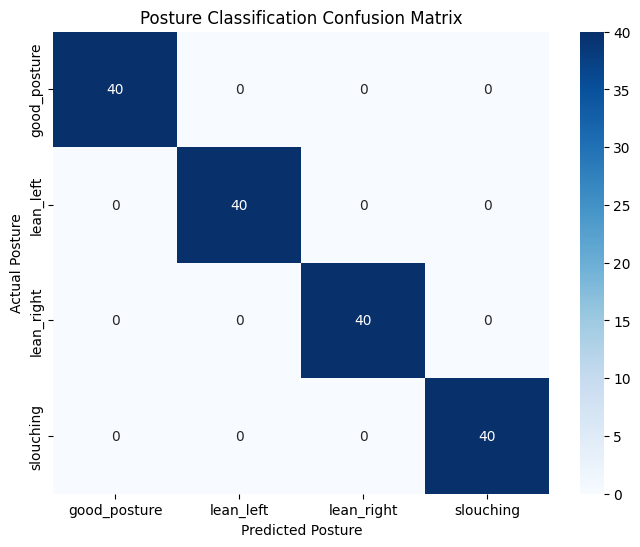


💾 Model saved as: posture_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model downloaded to your computer!


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged data
data = pd.read_csv('posture_data.csv')

print("📊 DATASET INFO:")
print(f"Total samples: {len(data)}")
print(f"Posture distribution:")
print(data['label'].value_counts())

# Prepare data for AI
X = data[['x', 'y', 'z']]  # Features (sensor data)
y = data['label']          # Labels (posture names)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n🎯 TRAINING SETUP:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Train the AI model
print("\n🤖 TRAINING AI MODEL...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ MODEL PERFORMANCE:")
print(f"Accuracy: {accuracy:.2%}")
print(f"\n📈 DETAILED REPORT:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
print("\n🎯 CONFUSION MATRIX:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Posture Classification Confusion Matrix')
plt.ylabel('Actual Posture')
plt.xlabel('Predicted Posture')
plt.show()

# Save the trained model
joblib.dump(model, 'posture_model.pkl')
print(f"\n💾 Model saved as: posture_model.pkl")

# Download the model
from google.colab import files
files.download('posture_model.pkl')
print("✅ Model downloaded to your computer!")

In [ ]:
# Test with actual samples from your data
print("🧪 REAL-TIME PREDICTION TEST:")

test_samples = [
    [-0.9961, 0.0039, 0.1875],   # good_posture
    [-0.2227, 0.0117, 0.9219],   # slouching
    [-0.7109, -0.3711, 0.5547],  # lean_right
    [-0.7773, 0.4922, 0.3398]    # lean_left
]

posture_names = ['good_posture', 'slouching', 'lean_right', 'lean_left']

for i, sample in enumerate(test_samples):
    prediction = model.predict([sample])
    probabilities = model.predict_proba([sample])
    confidence = probabilities.max()
    predicted_class = model.classes_[probabilities.argmax()]

    print(f"   {posture_names[i]:12} → {predicted_class:12} (Confidence: {confidence:.1%})")

🧪 REAL-TIME PREDICTION TEST:
   good_posture → good_posture (Confidence: 100.0%)
   slouching    → slouching    (Confidence: 100.0%)
   lean_right   → lean_right   (Confidence: 100.0%)
   lean_left    → lean_left    (Confidence: 99.0%)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local